In [48]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [49]:
job_count = df.groupby('job_title_short').agg(
    Median_Salary = ('salary_year_avg', 'median'),
    Job_Count = ('job_title_short', 'count')
).reset_index().copy()

job_count

,job_title_short,Median_Salary,Job_Count
0,Business Analyst,85000.0,49063
1,Cloud Engineer,90000.0,12331
2,Data Analyst,90000.0,196075
3,Data Engineer,125000.0,186241
4,Data Scientist,127500.0,172286
5,Machine Learning Engineer,106415.0,14080
6,Senior Data Analyst,111175.0,29216
7,Senior Data Engineer,147500.0,44563
8,Senior Data Scientist,155500.0,36957
9,Software Engineer,99150.0,44929


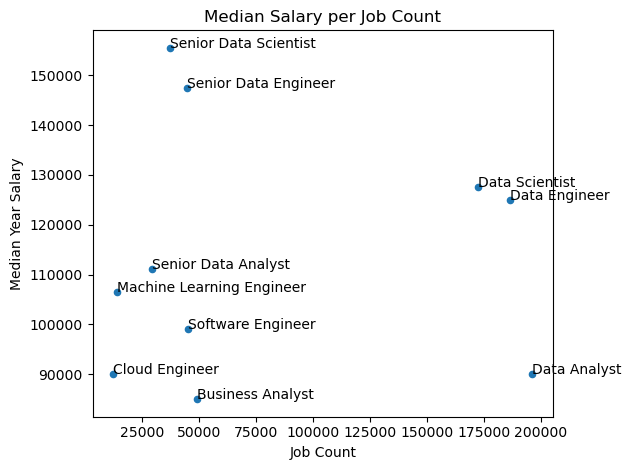

In [50]:
job_count.plot(kind='scatter', x='Job_Count', y='Median_Salary')

for i, txt in enumerate(job_count['job_title_short']):
    plt.text(job_count['Job_Count'].iloc[i], job_count['Median_Salary'].iloc[i], txt)


plt.xlabel('Job Count')
plt.ylabel('Median Year Salary')
plt.title('Median Salary per Job Count')
plt.tight_layout()


In [51]:
job_count = df.groupby(df['job_country']).agg(
    Median_Salary = ('salary_year_avg', 'median'),
    Job_Count = ('job_country', 'count')
).reset_index().dropna().copy()

top_7 = job_count.nlargest(7, 'Job_Count')
top_7

,job_country,Median_Salary,Job_Count
152,United States,119187.5,206292
63,India,111175.0,51088
151,United Kingdom,104668.0,40375
48,France,97444.0,39922
50,Germany,111175.0,27694
133,Spain,98391.5,25100
127,Singapore,100500.0,23696


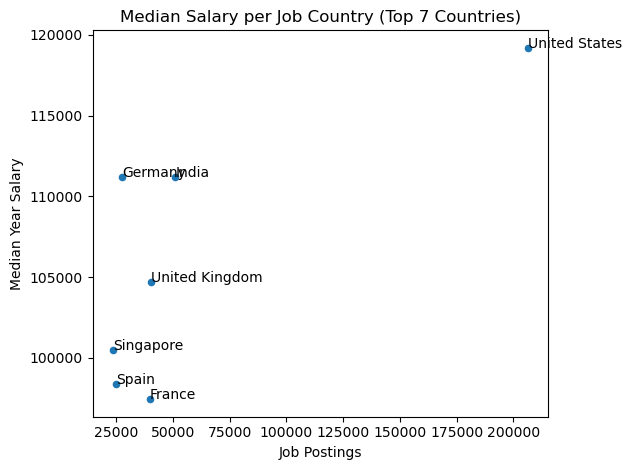

In [52]:
top_7.plot(kind='scatter', x='Job_Count', y='Median_Salary')
for i, txt in enumerate(top_7['job_country']):
    plt.text(top_7['Job_Count'].iloc[i], top_7['Median_Salary'].iloc[i], txt)

plt.xlabel('Job Postings')
plt.ylabel('Median Year Salary')
plt.title('Median Salary per Job Country (Top 7 Countries)')
plt.tight_layout()

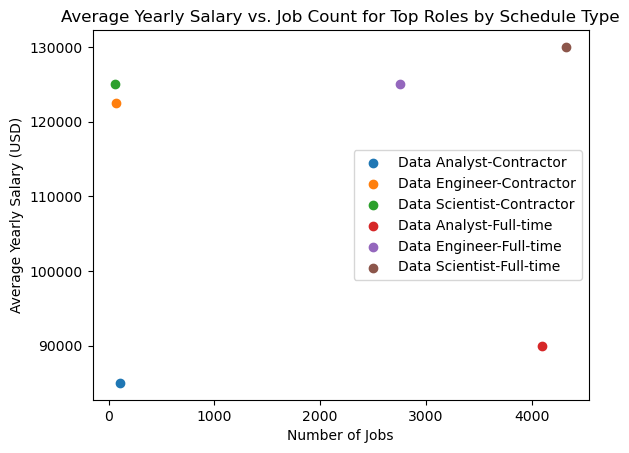

In [60]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

us_jobs_df = df[
    (df['job_country'] == 'United States') &
    (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
    (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
    Median_Salary = ('salary_year_avg', 'median'),
    Job_Count = ('job_title_short', 'count')
).dropna()


stats.reset_index(inplace=True)

stats['job_title_type'] = stats['job_title_short'] + '-' + stats['job_schedule_type']
for job_title_type in stats['job_title_type'].unique():
    subset = stats[stats['job_title_type'] == job_title_type]
    plt.scatter(subset['Job_Count'], subset['Median_Salary'], label=job_title_type)


plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type') 
plt.legend()
plt.show()
